# Prueba F de Fisher para el estudio de la dependencia de las calificaciones de un estudiante con el nivel de estudio de su madre.

Para ilustrar el uso de la prueba de Fisher, vamos a trabajar con la base de datos que se puede encontrar [aquí](https://www.kaggle.com/datasets/ishandutta/student-performance-data-set) y que está analizada en [aquí](https://repositorium.sdum.uminho.pt/handle/1822/8024). Consiste en un conjunto de datos de distintos parámetros y resultados de evaluación en estudiantes de secundaria en Portugal (ver los vínculos para detalles).

#### Conjunto de datos correspondientes al nivel de estudio de la madre y las calificaciones de un estudiantes

El conjunto de datos está recogido en el archivo `student-mat.csv`, y la explicación de cada uno de los campos se puede encontrar en `student.txt`.
Procedemos a cargar los datos:

In [3]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Path to the csv file
csv_file_path = 'student-mat.csv'

Nos vamos fijar sólo en la relación entre el nivel de estudio de la madre, que viene en la columna "Medu" y viene expresado en cinco niveles, y la calificación final de la asignatura en la columna "G3", que viene expresado sobre 20.

In [5]:
# Defining the columns to read
usecols = ["Medu", "G3"]

# Read data with subset of columns
analisis_data=pd.read_csv(csv_file_path,sep=';',usecols=usecols)
data=analisis_data.to_numpy()

# Niveles en los que viene expresada la variable independiente
ai=[0, 1, 2, 3, 4]
y_data=data[:,1]
x_data=data [:,0]


Representar los datos

Text(0, 0.5, '$Calificaciones\\ sobre\\ 20$')

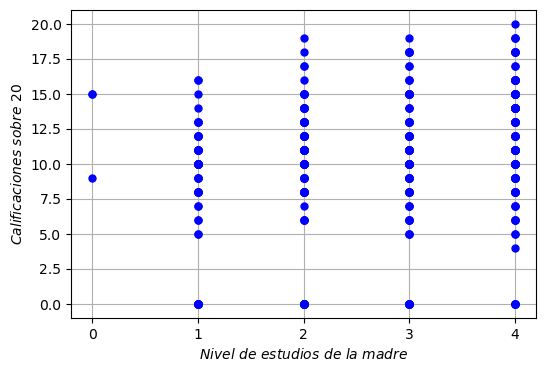

In [7]:
fig=plt.figure(figsize=[6,4])
ax=fig.gca()
plt.plot(x_data, y_data,'b-',linewidth=0.0, marker='o',markersize=5)
plt.grid(True)
plt.ylim([-1,21])
plt.xticks(ai)
plt.xlabel(r'$Nivel\ de\ estudios\ de\ la\ madre$',fontsize=10)
plt.ylabel(r'$Calificaciones\ sobre\ 20$',fontsize=10)


Calculamos la media de las calificaciones para cada nivel de estudio y las desviaciones típicas de estos valores

In [9]:
mma=np.zeros(len(ai))
sta=np.zeros(len(ai))

for i in range(len(ai)):
    aa=np.where(x_data == ai[i])
    [a_pp,a_length] = np.shape(aa)
    yy=y_data[aa]
    mma[i]=np.mean(yy)
    sta[i]=np.std(yy,ddof=1)/np.sqrt(a_length)


Representamos estos valores

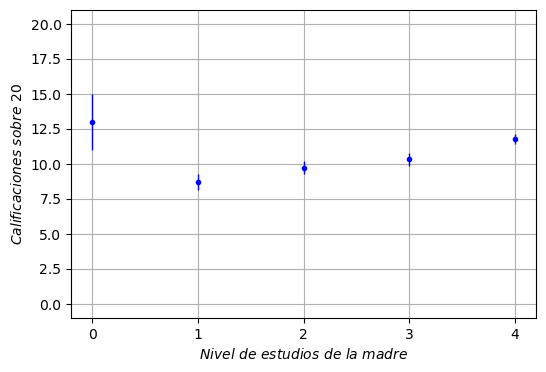

In [12]:
fig=plt.figure(figsize=[6,4])
ax=fig.gca()
plt.errorbar(ai, mma, xerr=0, yerr=sta, fmt='b.', linewidth=1, label='datos medios')
plt.ylim([-1,21])
plt.xlabel(r'$Nivel\ de\ estudios\ de\ la\ madre$',fontsize=10)
plt.ylabel(r'$Calificaciones\ sobre\ 20$',fontsize=10)
plt.xticks(ai)
a_pp=plt.grid(True)
#a_pp=plt.plot(ai, mma,'b-',linewidth=0.0, marker='o',markersize=3)

Se observa como el nivel de estudio 0, que corresponde con no tener estudios, es poco significativo, ya que tiene solo dos elementos. Esto se ve reflejado en la gran desviación típica que presenta, comparado con los otros.

Ahora queremos estudiar si se puede extraer de los datos que el nivel de estudio de la madre de un estudiante afecta en su calificación. Para ello vamos a realizar la prueba de F de Fischer.

### Prueba F de Fisher

Comenzamos calculando los parámetros de los modelos.

#### Parámetros del modelo constante

Para el modelo constante, el cálculo del parámetro es inmediato, ya que corresponde con la media ponderada y su desviación típica con la desviación típica de la media ponderada.

In [14]:
b1=sum(mma/sta**2)/sum(1/sta**2)
st1=1/np.sqrt(sum(1/sta))
y1=b1+np.multiply(0,ai)

La variable `y1` corresponde los resultados esperados según el modelo constante.

#### Parámetros del modelo lineal

En el caso del modelo lineal utilizamos la función `curve_fit()`, como se hace en las prácticas, para obtener el término independiente y la pendiente, que los recogemos en la variable `popt2`, mientra que `pcov` es la matriz error, que tiene las varianzas de los parámetros en la diagonal y la covarianza de los parámetros fuera de la diagonal.


In [16]:
def func2(x, a,b2):
    return a*x+b2

popt2, pcov2 = curve_fit(func2,ai,mma, sigma=sta, absolute_sigma=True)
y2=np.multiply(popt2[0],ai)+popt2[1]

En la variable `y2` está recogida la predicción de las calificaciones según el modelo lineal.

#### Representación de la predicción de los modelos

Ahora vamos a representar las predicciónes del modelo constante y el modelo lineal


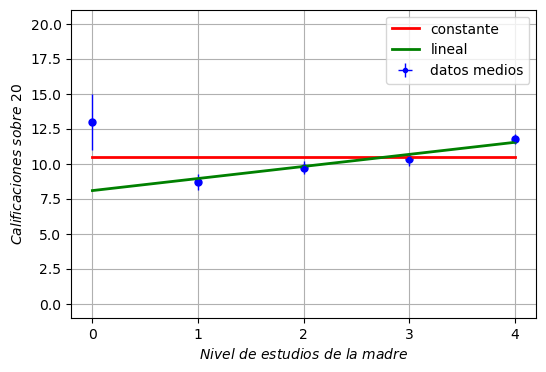

In [18]:
fig=plt.figure(figsize=[6,4])
ax=fig.gca()
plt.plot(ai, mma,'b-',linewidth=0.0, marker='o',markersize=5)
plt.errorbar(ai, mma, xerr=0, yerr=sta, fmt='b.', linewidth=1, label='datos medios')
plt.plot(ai, y1, 'r-', label='constante',linewidth=2.0)
plt.plot(ai, y2, 'g-', label='lineal',linewidth=2.0)
#plt.xlim([0.9,4.1])
plt.ylim([-1, 21])
plt.grid(True)
plt.xlabel(r'$Nivel\ de\ estudios\ de\ la\ madre$',fontsize=10)
plt.ylabel(r'$Calificaciones\ sobre\ 20$',fontsize=10)
plt.xticks(ai)
a_pp=plt.legend(loc='best',fontsize=10)


#### Prueba de la F de Fisher

Vamos a ver si los datos con los que trabajamos apoyan la existencia de una relación entre las calificaciones de los estudiandes y el nivel de estudio de la madre. Para ello vamos a calcular el valor de F.

In [20]:
chisq1 = sum(((mma-y1)/ sta) ** 2)
red_chisq1=chisq1/(len(ai)-1)
chisq2 = sum(((mma-y2)/ sta) ** 2)
red_chisq2=chisq2/(len(ai)-2)
F=(chisq1-chisq2)/(chisq2/(len(ai)-2))
print(F)

7.821337267250374


Ahora vamos a ver el percentil que corresponde con el valor de la F obtenido

In [22]:
F_cdf=stats.f.cdf(F,1,len(ai)-2)
print(F_cdf)

0.9319590259194144


Este valor corresponde con la probabildiad (en tanto por uno) de que una variable que siga una distribución de Fisher con los grados de libertad que tenemos, tenga un valor igual o menor al valor de F obtenido. De igual forma, la probabilidad (en tanto por uno) de que una variable de Fisher tenga un valor igual o mayor que el valor obtenido es de

In [24]:
F_alpha=1-F_cdf
print(F_alpha)

0.06804097408058563


Dependiendo del nivel de significación que se haya establecido se rechazará o no la hipótesis de independencia, y se aceptará o no una dependencia al menos lineal entre los datos.
Si tomamos un nivel de significación del 5 %, lo que es un nivel muy común, no rechazaríamos la hipótesis de independencia, y concluiríamos que a partir de los datos no podemos inferir una relación entre el nivel de estudios de la madre de un estudiante y sus calificaciones.

## Relación entre las calificaciones de un estudiantes y otros valores

Se puede repetir el estudio este mismo estudio con otros factores. Vamos a hacer algunos ejemplos.

#### Relación entre el nivel de estudios del padre y las calificaciones de un estudiante

Veamos lo que obtenemos

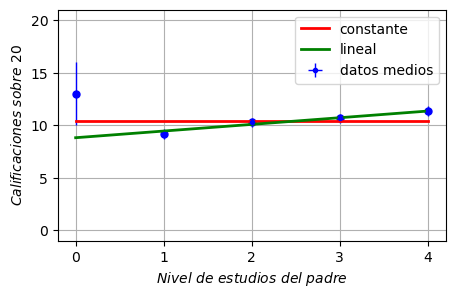

In [51]:
usecols = ["Fedu", "G3"]
analisis_data=pd.read_csv(csv_file_path,sep=';',usecols=usecols)
data=analisis_data.to_numpy()
ai=[0, 1, 2, 3, 4]
y_data=data[:,1]
x_data=data [:,0]
mma=np.zeros(len(ai))
sta=np.zeros(len(ai))

for i in range(len(ai)):
    aa=np.where(x_data == ai[i])
    [a_pp,a_length] = np.shape(aa)
    yy=y_data[aa]
    mma[i]=np.mean(yy)
    sta[i]=np.std(yy,ddof=1)/np.sqrt(a_length)

b1=sum(mma/sta**2)/sum(1/sta**2)
st1=1/np.sqrt(sum(1/sta))
y1=b1+np.multiply(0,ai)

popt2, pcov2 = curve_fit(func2,ai,mma, sigma=sta, absolute_sigma=True)
y2=np.multiply(popt2[0],ai)+popt2[1]

chisq1 = sum(((mma-y1)/ sta) ** 2)
red_chisq1=chisq1/(len(ai)-1)
chisq2 = sum(((mma-y2)/ sta) ** 2)
red_chisq2=chisq2/(len(ai)-2)
F=(chisq1-chisq2)/(chisq2/(len(ai)-2))
F_cdf=stats.f.cdf(F,1,len(ai)-2)
fig=plt.figure(figsize=[5,3])
ax=fig.gca()
plt.plot(ai, mma,'b-',linewidth=0.0, marker='o',markersize=5)
plt.errorbar(ai, mma, xerr=0, yerr=sta, fmt='b.', linewidth=1, label='datos medios')
plt.plot(ai, y1, 'r-', label='constante',linewidth=2.0)
plt.plot(ai, y2, 'g-', label='lineal',linewidth=2.0)
#plt.xlim([0.9,4.1])
plt.ylim([-1, 21])
plt.grid(True)
plt.xlabel(r'$Nivel\ de\ estudios\ del\ padre$',fontsize=10)
plt.ylabel(r'$Calificaciones\ sobre\ 20$',fontsize=10)
plt.xticks(ai)
a_pp=plt.legend(loc='best',fontsize=10)

El valor de F y el percentil son

In [53]:
print(f'Valor de F: {F}')
print(f'Percentil: {F_cdf}')

Valor de F: 10.905860593589747
Percentil: 0.9543488322282417


En este caso para un nivel de sifnificación del 5% sí rechazamos la hipótesis de independencia.

#### Relación entre el número de horas de estudio y las calificaciones de un estudiante

Veamos lo que obtenemos

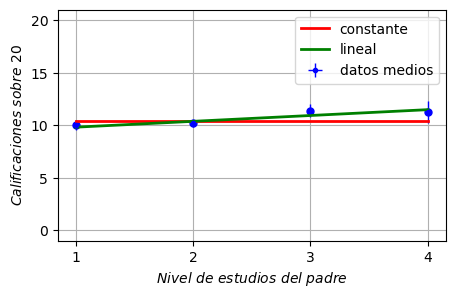

In [56]:
usecols = ["studytime", "G3"]
analisis_data=pd.read_csv(csv_file_path,sep=';',usecols=usecols)
data=analisis_data.to_numpy()
ai=[1, 2, 3, 4]
y_data=data[:,1]
x_data=data [:,0]
mma=np.zeros(len(ai))
sta=np.zeros(len(ai))

for i in range(len(ai)):
    aa=np.where(x_data == ai[i])
    [a_pp,a_length] = np.shape(aa)
    yy=y_data[aa]
    mma[i]=np.mean(yy)
    sta[i]=np.std(yy,ddof=1)/np.sqrt(a_length)

b1=sum(mma/sta**2)/sum(1/sta**2)
st1=1/np.sqrt(sum(1/sta))
y1=b1+np.multiply(0,ai)

popt2, pcov2 = curve_fit(func2,ai,mma, sigma=sta, absolute_sigma=True)
y2=np.multiply(popt2[0],ai)+popt2[1]

chisq1 = sum(((mma-y1)/ sta) ** 2)
red_chisq1=chisq1/(len(ai)-1)
chisq2 = sum(((mma-y2)/ sta) ** 2)
red_chisq2=chisq2/(len(ai)-2)
F=(chisq1-chisq2)/(chisq2/(len(ai)-2))
F_cdf=stats.f.cdf(F,1,len(ai)-2)
fig=plt.figure(figsize=[5,3])
ax=fig.gca()
plt.plot(ai, mma,'b-',linewidth=0.0, marker='o',markersize=5)
plt.errorbar(ai, mma, xerr=0, yerr=sta, fmt='b.', linewidth=1, label='datos medios')
plt.plot(ai, y1, 'r-', label='constante',linewidth=2.0)
plt.plot(ai, y2, 'g-', label='lineal',linewidth=2.0)
#plt.xlim([0.9,4.1])
plt.ylim([-1, 21])
plt.grid(True)
plt.xlabel(r'$Nivel\ de\ estudios\ del\ padre$',fontsize=10)
plt.ylabel(r'$Calificaciones\ sobre\ 20$',fontsize=10)
plt.xticks(ai)
a_pp=plt.legend(loc='best',fontsize=10)

El valor de F y el percentil son

In [58]:
print(f'Valor de F: {F}')
print(f'Percentil: {F_cdf}')

Valor de F: 4.93185023903774
Percentil: 0.8434908085774162


En este caso para un nivel de sifnificación del 5% no rechazamos la hipótesis de independencia, por lo que no encontramos relación entre las horas de estudio que un estudiante dedica y las calificaciones obtenidas